## Import the required libraires 

In [4]:
## import required libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras 
import keras 
from keras import backend as k 
from keras.models import Model
import tensorflow as tf
from keras.layers import Input, Layer
#++++++++++++++++++++++++++++++++++++++++++++++
# load dataset from keras 
# code to load dataset 

## Split data into training and testing

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Split into valid and training and showing first image

In [6]:
def format_data(X_train,X_test,y_train,y_test): 
  # (X_t1rain,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
  # print("Rescale image in range [0,,1]")
  X_train = X_train/255.0
  X_test  = X_test/255.0  
  fig = plt.figure(figsize = (16,8))
  subplot = plt.subplot(1,1,1)
  show_image = plt.imshow(X_train[0],cmap = 'gray')
  subplot_2 = plt.subplot(2,2,1)
  show_image_2 = plt.imshow(X_train[1],cmap = 'gray')
  title = plt.title('Image')
  lengend = plt.legend()
  plt.show()
  ## divide training set into a valid and a subtrain
  X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train, test_size = 0.33, shuffle = True, random_state = 43)
  return X_train,X_valid,y_train,y_valid 

No handles with labels found to put in legend.


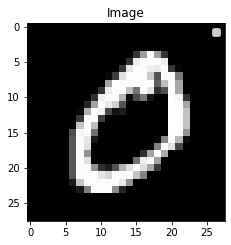

In [7]:
X_train,X_valid,y_train,y_valid = format_data(X_train,X_test,y_train,y_test)

## We will self_definition layers by using activation and kernel  

In [17]:
class DoubleFullyConnectedLayer(Layer): 
  def __init__(self,n_units = 10, activation = tf.nn.relu) : 
    print("__init__called")
    # goi ham khoi tao cua lop cha
    super(DoubleFullyConnectedLayer,self).__init__()
    ## n_units, activation là tham số do mình tự định nghĩa
    self.n_units = n_units   
    self.activation_function = activation 
  ## Thiet lap layer and paramters required
  def build(self,input_shape) : 
    print("build called") 
    self.kernel = self.add_variable(name='kernel',
                                   shape=[int(input_shape[-1]), self.n_units], 
                                   initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01))                                
    # khai bao vector bias 
    self.bias = self.add_variable(name = 'bias',shape =[self.n_units],initializer = keras.initializers.Ones())
  def call(self,inputs) : 
    print("call called") 
    matmul = tf.matmul(inputs,self.kernel) + self.bias
    outputs = self.activation_function(matmul)  ##áp dụng hàm kích hoạt

    return outputs 
  

inputs = keras.layers.Input(shape = (300,)) 
conv = DoubleFullyConnectedLayer(n_units = 10) 
conv_output = conv(inputs) 

print(conv.trainable_variables)

  

__init__called
build called
call called
[<tf.Variable 'double_fully_connected_layer_3/kernel:0' shape=(300, 10) dtype=float32, numpy=
array([[-1.2813851e-02,  9.9212164e-05,  3.0333768e-03, ...,
         1.9084021e-03,  4.1430811e-03, -2.3093421e-03],
       [ 1.4176230e-02, -1.9399850e-03,  2.9725218e-03, ...,
        -5.9579866e-04, -9.4432505e-03,  1.0168953e-02],
       [ 1.4547297e-02, -8.8125309e-03,  8.5208602e-03, ...,
        -7.9980828e-03,  1.1744226e-02,  1.5211366e-03],
       ...,
       [-1.0123297e-02, -1.0293073e-03, -1.6715867e-03, ...,
        -1.2288530e-02, -2.2700664e-02, -8.9958105e-03],
       [-1.3168331e-02,  1.1619020e-02,  2.0567365e-02, ...,
        -1.7749082e-02,  1.6837232e-03,  1.2784756e-02],
       [ 7.8593707e-03,  5.8196872e-03, -1.2134064e-02, ...,
         2.7265253e-03,  2.6589057e-03,  1.1351411e-03]], dtype=float32)>, <tf.Variable 'double_fully_connected_layer_3/bias:0' shape=(10,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1.,

In [ ]:
class ConvMaxpoolBlock() : 
  